# Project Name- SYRIATEL CUSTOMER CHURN

# 1. Business Understanding

### 1.1 Business Overview

SyriaTel is a communications company that offers mobile and communications services to it's customers. Customer churn refers to a situation where customers stop using company's products or services over a given period. In the telecommunications industry, this often means customers cancel their mobile, internet, or bundled service subscriptions and switch to a competitor.
The business goal is to reduce customer churn, which directly impacts revenue and long-term profitability. By analyzing customer behavior and service usage data, SyriaTel aims to identify customers who are likely to leave and implement proactive strategies to retain them.


### 1.2 Problem Statement

SyriaTel is experiencing a significant number of customers discontinuing their services. Losing customers not only affects immediate revenue but also increases customer acquisition costs. The problem is to identify patterns in customer data that signal a high risk of churn and develop a predictive model to flag such customers before they leave.


### 1.3 Business Objectives

#### Main Objective:
To build a predictive model that accurately identifies customers at risk of churning, allowing the business to take timely retention actions.

#### Specific Objectives:

* To Identify and prioritize the top churn drivers.
* To determine how much revenue is lost due to customer churn.
* To build a baseline model to predict churn with interpretable results.
* To compare and evaluate the performance of different models to determine the most effective.
* To optimize pricing for retention.

### 1.4 Research Questions

* What are the top churn factors driving customer churn?
* How much revenue is lost due to customer churn over a given period?
* Can a baseline machine learning model accurately predict whether a customer will churn?
* Which machine learning model performs best in predicting churn based on classification metrics?
* How does pricing impact customer retention, and what pricing strategies can be implemented to reduce churn without significantly impacting revenue?

### 1.5 Success Criteria

Business Success: Reduction in churn rate, increased retention, and improved customer satisfaction.

Data Mining Success: Accurate predictive model.

# 2. Data Understanding
### 2.1 Dataset Overview
The dataset contains historical information about customers which includes their usage patterns and trends and interactions with customer service. The target variable is churn, which indicates whether a customer has left the service (1 = Left or 0 = Stayed). 
#### 2.2 Data Quality Checks
 - *Missing Values:* Check for null or missing entries in any column. In SyriaTel there are no missing values.
 - *Data Types:* Ensure numeric columns (e.g., minutes, charges, calls) are of numeric types for correlation and modelling. Convert the churn column to numeric instead of it being float. 
 - *Outliers:* Identify unusually high or low values (e.g, extremely high day minutes) that may affect the model and churn is the Target variable.
#### 2.3 Exploration Insights
* Features like customer service calls, total day charge and total day minutes show a higher correlation with churn, these shows that they are key indicators of potential churn.
* Other usage and billing features have weak correlation but may still contribute when combined in a predictive model.
* Categorical features such as area code are less likely to impact churn individually but may have subtle effects in combination with other variables.


# 3. Data Preparation

In the churn prediction dataset, the main tasks include cleaning, transforming, and structuring the data.

In [1]:
# importing the necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# loading our dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
# previewing the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Generate summary statistics for the columns in the DataFrame.
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Handling Missing Values
* Checking each column for null or missing values

In [5]:
# checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### Handling duplicated values
Checking each column for duplicated values and according toour dat there are no duplicate values.

In [6]:
# checking for duplicates
data.duplicated().sum()

0

#### Partial imbalance
* Checking for dominant categories, which is useful for spotting imbalance before modeling.

In [7]:
data.describe(include=['object']).T[['top', 'freq']]

,top,freq
state,WV,106
phone number,382-4657,1
international plan,no,3010
voice mail plan,no,2411


In [8]:
# data type of each column in the DataFrame.
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

#### Convert Data type
* Convert data type(churn) from boolean to integers(int64).

In [9]:
data['churn'] = data['churn'].astype('int64')

In [10]:
# check data type again to ensure it has been changed
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [11]:
# Shows the structure of the data set
data.shape

(3333, 21)

#### Related Features
* Checks which numeric features are most related to churn, which is useful when doing feature selection or understanding the data.

In [12]:
data.select_dtypes(include='number').corr()['churn']

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

EDA

# This Shows the average charges for customers who churned vs who stayed. If churners consistently have higher charges, that shows that there is a pricing issue.
# The figure shows how churners vs who stayed differ in daytime charges. Also shows churners clustered at higher charges.

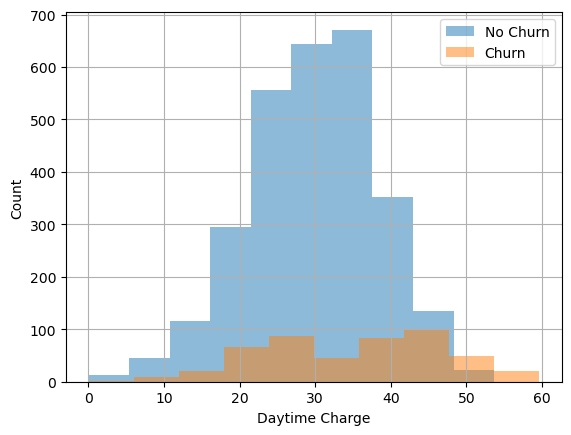

In [12]:
# show pricing differences using churn
pricing_data = data.groupby('churn')[['total day charge',
                     'total eve charge',
                     'total night charge',
                     'total intl charge']].mean()
# plot the figure to show pricing difference against churn

data[data['churn'] == 0]['total day charge'].hist(alpha=0.5, label='No Churn')
data[data['churn'] == 1]['total day charge'].hist(alpha=0.5, label='Churn')
plt.xlabel("Daytime Charge")
plt.ylabel("Count")
plt.legend()
plt.show()

# MODELING

## Logistic Regression churn model:
## The model gives an intrepretation of coefficients and the direction it takes and the effect.

                   Feature  Coefficient
13  customer service calls     0.449423
10      total intl minutes     0.083968
12       total intl charge     0.028885
1        total day minutes     0.012379
4        total eve minutes     0.007331
9       total night charge     0.005682
2          total day calls     0.003070
7      total night minutes     0.002412
0           account length     0.001243
5          total eve calls     0.000769
8        total night calls     0.000764
3         total day charge     0.000759
6         total eve charge    -0.011354
11        total intl calls    -0.080839


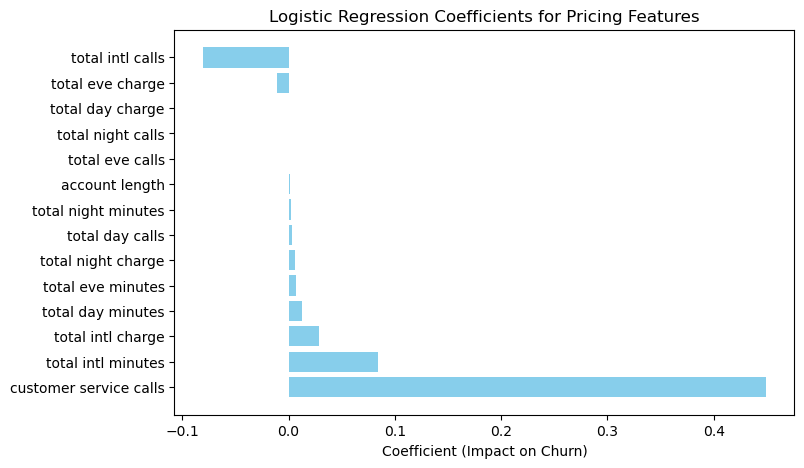

In [13]:
#Fit a model using all charges at once, Using the original data, not aggregated(pricing_data)
X = data[['account length','total day minutes',         
           'total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge'        
,'total intl minutes'        
,'total intl calls'          
,'total intl charge'         
,'customer service calls'    
]]
y = data['churn']

# Train-test split (To preserve the churn ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y )
# logistic regression baseline
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef)

# Plot coefficients
plt.figure(figsize=(8,5))
plt.barh(coef['Feature'], coef['Coefficient'], color='skyblue')
plt.xlabel("Coefficient (Impact on Churn)")
plt.title("Logistic Regression Coefficients for Pricing Features")
plt.show()


* International charges are the biggest churn driver. Customers who spend more on international calls are much more likely to leave.
* Day & evening charges matter, but less strongly and the night charges are almost irrelevant showing that pricing at night isn’t causing churn.

# Random Forest churn model

In [14]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, min_samples_leaf = 10,  class_weight="balanced" )

rf_model.fit(X_train, y_train)

# check for churn probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Apply lower threshold 

threshold = 0.5
y_pred_thresh = (y_proba >= threshold).astype(int)


# Test for  Accuracy score
accuracy = accuracy_score(y_test, y_pred_thresh)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Detailed performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh))

#  Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))



Random Forest Accuracy: 0.8840

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       855
           1       0.59      0.68      0.63       145

    accuracy                           0.88      1000
   macro avg       0.77      0.80      0.78      1000
weighted avg       0.89      0.88      0.89      1000


Confusion Matrix:
[[785  70]
 [ 46  99]]


* The model correctly identifies 59% of churners (recall = 0.59) and the 68% of predicted churners are actually those who left(precision = 0.68).

* Accuracy is slightly average (0.88) due to more stable trees. Using min_samples_leaf=10 prevents overfitting and increases model generalizability. Threshold is a cutoff on predicted probabilities to decide the  class labels.A lower threshold shows more churners (higher recall) and a higher threshold shows fewer false positives (higher precision).

## Retention Strategy:

* Consider international call bundles or discount plans to keep high-value customers while also offering daytime loyalty discounts for heavy users.

## Pricing Optimization:

* Evening and night rates are fine and to leave them as they are and also focus on price adjustments where customers feel they are spending(daytime & international usage.)

## Modeling Takeaway:

* If you build a full churn prediction model, international charge will likely be one of the top predictors.